In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from pathlib import Path

# 2D plots of npy files

In [5]:
data_folder_path = Path('data')
#property options: SG, PRES, VERDSPLGEO, GEORTYPE
arr = np.load(data_folder_path / 'rst_npy' / 'case1_SG.npy')
arr.shape

(117, 107, 39, 6)

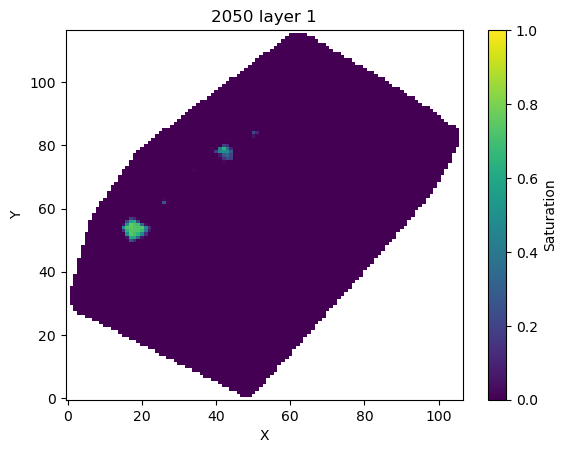

In [8]:
prop = "SG"; layer = 1; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load(data_folder_path / 'rst_npy' / f'case1_{prop}.npy') #SG, PRES, VERDSPLGEO
plt.imshow(arr[:,:,layer-1,year_list.index(year)], origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=1)
# plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Saturation")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

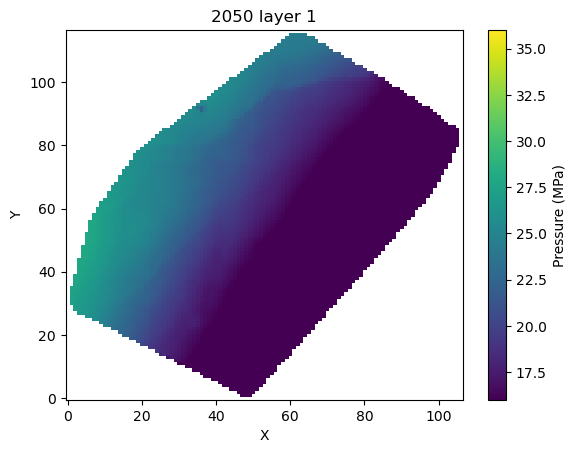

In [ ]:
prop = "PRES"; layer = 1; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load(data_folder_path / 'rst_npy' / f'case1_{prop}.npy') #SG, PRES, VERDSPLGEO
plt.imshow(arr[:,:,layer-1,year_list.index(year)]/1000, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=16, vmax=36)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Pressure (MPa)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

# 2D plots of fault table

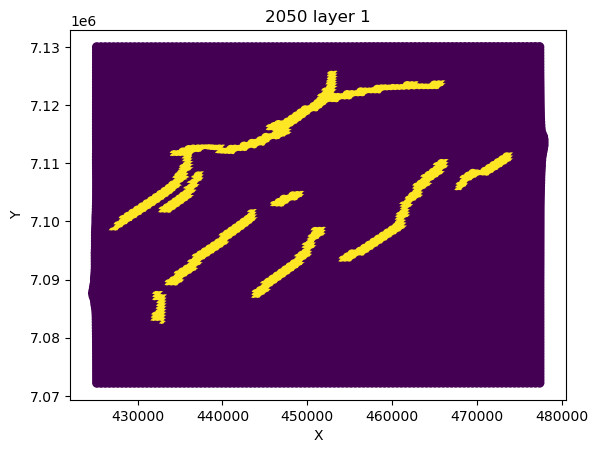

In [4]:
layer = 1; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = pd.read_csv('results/case1_fault_table.csv')
plt.scatter(arr[arr['k'] == layer]['x_ave'], arr[arr['k'] == layer]['y_ave'], c=arr[arr['k'] == layer]['fault_id'], cmap='viridis', vmin=0, vmax=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()